<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/VanishingAndExplodingGradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
np.random.seed(42)

X = np.random.randn(2000, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation_fn, layers=20):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(2, 32)
        self.hidden_layers = nn.ModuleList()
        for _ in range(layers - 1):
            self.hidden_layers.append(nn.Linear(32, 32))
        self.output_layer = nn.Linear(32, 1)
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.activation_fn(self.input_layer(x))
        for layer in self.hidden_layers:
            x = self.activation_fn(layer(x))
        x = torch.sigmoid(self.output_layer(x))
        return x


In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
def train_model(model, train_loader, epochs=100):
    criterion = nn.BCELoss() # Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_history = []

    for epoch in range(epochs):
        model.train()
        current_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            current_loss += loss.item()
        loss_history.append(current_loss / len(train_loader))
    return loss_history

# Instantiate models
sigmoid_pytorch_model = NeuralNetwork(activation_fn=torch.sigmoid, layers=20)
relu_pytorch_model = NeuralNetwork(activation_fn=torch.relu, layers=20)


In [ ]:
sigmoid_pytorch_history = train_model(sigmoid_pytorch_model, train_loader, epochs=100)
relu_pytorch_history = train_model(relu_pytorch_model, train_loader, epochs=100)


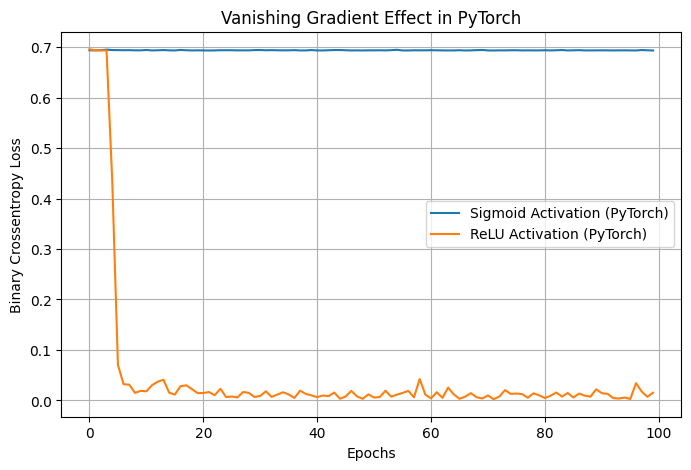

Loss curves for PyTorch models plotted successfully.


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(sigmoid_pytorch_history, label='Sigmoid Activation (PyTorch)')
plt.plot(relu_pytorch_history, label='ReLU Activation (PyTorch)')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Vanishing Gradient Effect in PyTorch')
plt.legend()
plt.grid(True)
plt.show()
print("Loss curves for PyTorch models plotted successfully.")